# <center>泰坦尼克号乘客样本数据分析报告</center>

## 一、项目说明
本项目是优达学城（Udacity）机器学习（入门）课程的一个探索数据集实践项目。<br>
样本数据下载自[泰坦尼克号数据](https://github.com/ShiChJ/DAND-Basic-Materials/blob/master/P2/Project_Files/titanic-data.csv)：该数据集包含了泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。<br>
同时在 [Kaggle 网站](https://www.kaggle.com/c/titanic/data)上可以查看这个数据集的详细描述，而这个数据集就是来自 Kaggle。<br>

In [1]:
# 水印魔术命令
%load_ext watermark
%watermark -a "Lingjian" -u -d -v -p numpy,pandas,matplotlib

Lingjian 
last updated: 2018-02-04 

CPython 3.6.1
IPython 6.0.0

numpy 1.14.0
pandas 0.22.0
matplotlib 2.0.2


## 二、数据加载预览

In [2]:
# 可视化显示魔术命令
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 可视化中文字体显示设置
plt.rc('font', family='SimHei', size=13)
# 可视化负号显示设置
plt.rc('axes', unicode_minus=False)

In [3]:
# 用 pandas 读取 csv 文件，加载到数据框（DataFrame）
raw_passengers_df = pd.read_csv('titanic-data.csv')
# 原始数据预览
raw_passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 原始数据基本信息
raw_passengers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


基本信息显示，数据集有891条记录，有PassengerId、Survived、Pclass、Name、Sex、Age等12个字段。<br>
其中，有714条 Age 非空值记录（也就是有177条 Age 为空值的记录），Cabin 为非空值的只有少量记录；<br>
有数据类型为 float64 的字段有2个，为 int64 的有5个，为 object 的有5个。

### 原始数据字段含义说明：
PassengerId：乘客编号<br>
Survived：是否幸存  0 = 遇难，1 = 幸存<br>
Pclass：船舱等级  1 = 头等舱，2 = 二等舱，3 = 三等舱<br>
Name：乘客姓名<br>
Sex：性别<br>
Age：年龄<br>
SibSp：登船的兄弟姐妹或配偶个数<br>
Parch：登船的父母或小孩个数<br>
Ticket：船票号码<br>
Fare：船票价格<br>
Cabin：船舱号<br>
Embarked：登船港口<br>

## 三、提出问题

初步预览数据后，我想针对数据提出以下问题：
#### 问题（1）全部样本乘客幸存者比例是多少？
#### 问题（2）不同性别乘客当中幸存者比例分别是多少？ 女性乘客当中幸存者比例是否比男性高？
#### 问题（3）船舱等级越高幸存者比例是否越高？
#### 问题（4）各年龄段的幸存者比例有何不同？
#### 问题（5）全部样本乘客各个属性与幸存的相关性如何？

## 四、数据预处理

In [5]:
# 数据预处理用的自定义函数

# 年龄分段
def age_to_group(age):
    if age >= 70:
        return '70+'
    elif age >= 60:
        return '60+'
    elif age >= 50:
        return '50+'
    elif age >= 40:
        return '40+'
    elif age >= 30:
        return '30+'
    elif age >= 20:
        return '20+'
    elif age >= 10:
        return '10+'
    elif age >= 0:
        return '0+'
    else:
        return '未知'

# 年龄分段改进，对年龄缺失的部分乘客按称谓做年龄分段
def age_to_group_fix(age_name_df):
    if age_name_df['Age'] >= 70:
        return '70+'
    elif age_name_df['Age'] >= 60:
        return '60+'
    elif age_name_df['Age'] >= 50:
        return '50+'
    elif age_name_df['Age'] >= 40:
        return '40+'
    elif age_name_df['Age'] >= 30:
        return '30+'
    elif age_name_df['Age'] >= 20:
        return '20+'
    elif age_name_df['Age'] >= 10:
        return '10+'
    elif age_name_df['Age'] >= 0:
        return '0+'
    elif 'Master'in age_name_df['Name']: # Master 称谓的乘客平均年龄是 4.574167
        return '0+'
    elif 'Miss'in age_name_df['Name']: # Miss 称谓的乘客平均年龄是 21.773973
        return '20+'
    else:
        return '未知'

# 性别的中文名称，便于可视化展示
def sex_to_chn(sex):
    if sex == 'male':
        return '男性'
    elif sex == 'female':
        return '女性'
    else:
        return '未知'

# 性别的有序编码，便于计算
def sex_to_code(sex):
    if sex == 'male':
        return 0
    elif sex == 'female':
        return 1
    else:
        return -1

# 船舱等级的中文名称，便于可视化展示
def pclass_to_chn(pclass):
    if pclass == 1:
        return '头等舱'
    elif pclass == 2:
        return '二等舱'
    elif pclass == 3:
        return '三等舱'
    else:
        return '未知'

# 船舱等级的有序编码，便于计算
def pclass_to_code(pclass):
    if pclass == 1:
        return 2
    elif pclass == 2:
        return 1
    elif pclass == 3:
        return 0
    else:
        return -1

# 幸存与否的中文名称，便于可视化展示
def survived_to_chn(survived):
    if survived == 0:
        return '遇难者'
    elif survived == 1:
        return '幸存者'
    else:
        return '未知'
    

In [6]:
# 深拷贝，创建新数据框，用于后续数据预处理及数据探索分析
passengers_df = raw_passengers_df.copy()

# 为了方便后续相关指标的可视化展示或计算，在新数据框中增加下面字段
passengers_df.insert(6,'年龄段',passengers_df['Age'].apply(age_to_group))
passengers_df.insert(6,'年龄段_改进后',passengers_df[['Age', 'Name']].apply(age_to_group_fix, axis=1))
passengers_df.insert(5,'性别',passengers_df['Sex'].apply(sex_to_chn))
passengers_df.insert(5,'SexCode',passengers_df['Sex'].apply(sex_to_code))
passengers_df.insert(3,'船舱等级',passengers_df['Pclass'].apply(pclass_to_chn))
passengers_df.insert(3,'PclassCode',passengers_df['Pclass'].apply(pclass_to_code))
passengers_df.insert(2,'是否幸存',passengers_df['Survived'].apply(survived_to_chn))

In [7]:
# 预处理后数据预览
passengers_df.head()

,PassengerId,Survived,是否幸存,Pclass,PclassCode,船舱等级,Name,Sex,SexCode,性别,Age,年龄段_改进后,年龄段,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,遇难者,3,0,三等舱,"Braund, Mr. Owen Harris",male,0,男性,22.0,20+,20+,1,0,A/5 21171,7.2500,NaN,S
1,2,1,幸存者,1,2,头等舱,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,女性,38.0,30+,30+,1,0,PC 17599,71.2833,C85,C
2,3,1,幸存者,3,0,三等舱,"Heikkinen, Miss. Laina",female,1,女性,26.0,20+,20+,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,幸存者,1,2,头等舱,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,女性,35.0,30+,30+,1,0,113803,53.1000,C123,S
4,5,0,遇难者,3,0,三等舱,"Allen, Mr. William Henry",male,0,男性,35.0,30+,30+,0,0,373450,8.0500,NaN,S


## 五、数据探索分析

In [8]:
# 分组幸存者比例及可视化 自定义函数
def groups_survived_rate_charts(groupby_c1=None, groupby_c2=None):
    '''
        按输入的一个或两个字段名称 分组求遇难者、幸存者人数及幸存者比例，并进行可视化。
        返回数据框(DataFrame)，其中包含各个组别的遇难者、幸存者人数及幸存者比例。
    '''
    # 可视化 x 轴坐标标签方向
    var_rot = 'horizontal'

    # 确定分组字段
    if groupby_c1 == None and groupby_c2 == None:
        return print('请至少输入一个分组字段')
    elif groupby_c1 != None and groupby_c2 == None:
        groupby_cs = [groupby_c1, '是否幸存']
    elif groupby_c1 == None and groupby_c2 != None:
        groupby_cs = [groupby_c2, '是否幸存']
    else:
        groupby_cs = [groupby_c1, groupby_c2, '是否幸存']
        var_rot = 'vertical'

    # 按分组字段汇总人数
    groups_data = passengers_df.groupby(groupby_cs).size()
    # 最后一层索引(即“是否幸存”)人数进行 行列转换
    groups_data_df = groups_data.unstack()
    # 按行计算幸存者比例，并插入到新列 
    groups_data_df.insert(2, '幸存者比例', groups_data_df['幸存者'] / groups_data_df.sum(axis=1))
    groups_data_df.columns.name = None  # 为了数据框数据显示明确，这里设为空
    
    # 分组人数堆叠柱状图
    groups_data_df[['遇难者', '幸存者']].plot(kind='bar', stacked=True, alpha=0.6)
    plt.ylabel("人数")
    # 幸存者比例折线图
    groups_data_df['幸存者比例'].plot(secondary_y=True, kind='line', style='gd-', rot=var_rot)
    plt.ylabel("幸存者比例")

    plt.show()

    # 返回数据框
    return groups_data_df


#### 问题（1）的探索

In [9]:
# 全部样本乘客求遇难者、幸存者人数及幸存者比例
all_passengers_group_data = passengers_df.groupby(['是否幸存']).size()  # 求人数
all_passengers_group_data_df = all_passengers_group_data.to_frame().T  # 转换成数据框
all_passengers_group_data_df.insert(2, '幸存者比例', all_passengers_group_data_df['幸存者'] / all_passengers_group_data_df.sum(1))  # 求幸存者比例
all_passengers_survived_rate_df = all_passengers_group_data_df.set_index([['全部样本乘客']])  # 为了数据框数据显示明确，建该名称的索引
all_passengers_survived_rate_df.columns.name = None  # 为了数据框数据显示明确，这里设为空
all_passengers_survived_rate_df

,幸存者,遇难者,幸存者比例
全部样本乘客,342,549,0.383838


问题（1）的探索结果是 全部样本乘客幸存者比例是0.38，为了描述方便，我在下文将此比例称为“样本平均水平”。

#### 问题（2）的探索

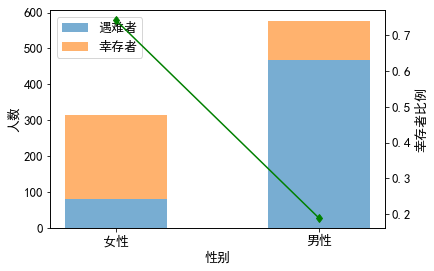

,幸存者,遇难者,幸存者比例
性别,,,
女性,233,81,0.742038
男性,109,468,0.188908


In [10]:
# 按性别 分组求遇难者、幸存者人数及幸存者比例
groups_survived_rate_charts('性别')

问题（2）的探索结果是 女性乘客当中幸存者比例远大于男性当中幸存者比例，且比样本平均水平高出近1倍。

#### 问题（3）的探索

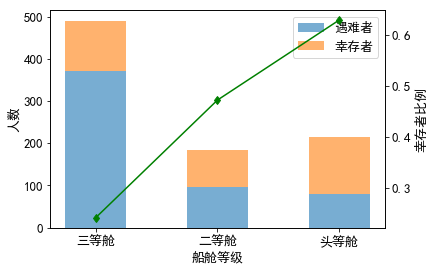

,幸存者,遇难者,幸存者比例
船舱等级,,,
三等舱,119,372,0.242363
二等舱,87,97,0.472826
头等舱,136,80,0.629630


In [11]:
# 按船舱等级 分组求遇难者、幸存者人数及幸存者比例
groups_survived_rate_charts('船舱等级')

问题（3）的探索结果是 船舱等级越高幸存者比例也越高，且三等舱低于样本平均水平，二等舱、头等舱皆高于样本平均水平。

#### 问题（2）、（3）的综合探索

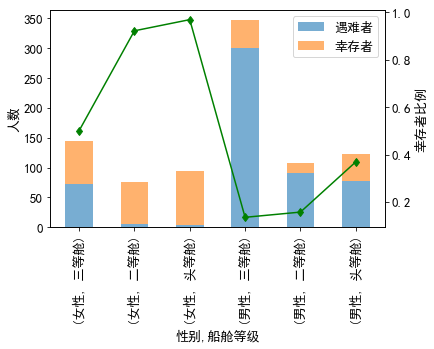

幸存者  遇难者     幸存者比例
性别 船舱等级                    
女性 三等舱    72   72  0.500000
   二等舱    70    6  0.921053
   头等舱    91    3  0.968085
男性 三等舱    47  300  0.135447
   二等舱    17   91  0.157407
   头等舱    45   77  0.368852

In [12]:
# 按性别、船舱等级 分组求遇难者、幸存者人数及幸存者比例
groups_survived_rate_charts('性别', '船舱等级')

问题（2）、（3）的综合探索结果是：<br>
头等舱女性当中幸存者比例最高（接近1），而三等舱男性当中幸存者比例最低（约0.13）。<br>
整体趋势是女性在不同等级的船舱中随着船舱等级的变高幸存者比例也变高，且头等舱比二等舱略高，但比三等舱高出近1倍；<br>
同样男性在不同等级的船舱中随着船舱等级的变高幸存者比例也变高，且头等舱比二等舱高出1倍，接近样本平均水平，而二等舱略高于三等舱；<br>
比较有趣的一点是女性在3个不同等级的船舱中幸存者比例皆高于男性。<br>
这次综合探索结果更加印证了问题（2）、问题（3）的单独探索结果。

#### 问题（4）的探索

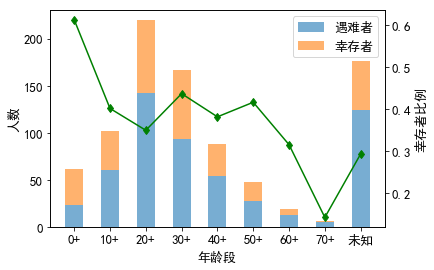

,幸存者,遇难者,幸存者比例
年龄段,,,
0+,38,24,0.612903
10+,41,61,0.401961
20+,77,143,0.350000
30+,73,94,0.437126
40+,34,55,0.382022
50+,20,28,0.416667
60+,6,13,0.315789
70+,1,6,0.142857
未知,52,125,0.293785


In [13]:
# 按年龄段 分组求遇难者、幸存者人数及幸存者比例
groups_survived_rate_charts('年龄段')

我们发现未知年龄的乘客人数较多，有没有办法对年龄缺失问题进行适当处理呢？<br>
查看源数据发现，Name字段含有对乘客称谓的信息(比如 Master. Miss. Mr. Mrs. Ms.)，<br>
根据常识，Miss.是对未婚女子的称呼，另查资料发现 Master.是20世纪初对未成年男子的一种称呼，<br>
根据这些信息我们可以将缺失年龄值的这两类人划分到相应年龄段（而其余称谓的年龄跨度太大，我们不做缺失值处理）。

In [14]:
# Master.称谓乘客的年龄分布情况
master_passengers = passengers_df['Name'].str.contains('Master.')
master_passengers_df = passengers_df[master_passengers]
master_passengers_df['Age'].describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

In [15]:
# Miss.称谓乘客的年龄分布情况
miss_passengers = passengers_df['Name'].str.contains('Miss.')
miss_passengers_df = passengers_df[miss_passengers]
miss_passengers_df['Age'].describe()

count    146.000000
mean      21.773973
std       12.990292
min        0.750000
25%       14.125000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

以上统计发现，<br>
Master.称谓乘客的平均年龄约4.57，<br>
Miss.称谓乘客的平均年龄约21.77，<br>
所以根据均值插入法我将年龄缺失的Master.称谓乘客归到 0+（即0至10(不含)）年龄段，<br>
将年龄缺失的Miss.称谓乘客归到 20+（即20至30(不含)）年龄段。<br>
下面是改进后年龄段分组统计情况：<br>

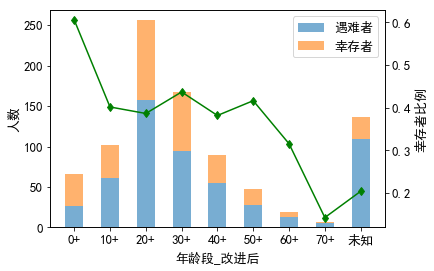

,幸存者,遇难者,幸存者比例
年龄段_改进后,,,
0+,40,26,0.606061
10+,41,61,0.401961
20+,99,157,0.386719
30+,73,94,0.437126
40+,34,55,0.382022
50+,20,28,0.416667
60+,6,13,0.315789
70+,1,6,0.142857
未知,28,109,0.204380


In [16]:
# 按改进后年龄段 分组求遇难者、幸存者人数及幸存者比例
groups_survived_rate_charts('年龄段_改进后')

改进后，未知年龄段人数从 177（52+125）人下降到 137（28+109）人；<br>
相应的，0+（即0至10(不含)）年龄段人数从 62（38+24）人增加到 66（40+26）人，<br>
20+（即20至30(不含)）年龄段人数从 220（77+143）人增加到 256（99+157）人。

问题（4）的探索结果是：<br>
0+（即0至10(不含)）年龄段乘客当中幸存者比例最高（约0.6，1.5倍于样本平均水平），<br>
10+、30+、50+ 年龄段乘客当中幸存者比例高于略高于样本平均水平，<br>
20+、40+ 年龄段乘客当中幸存者比例持平于样本平均水平，<br>
60+、70+ 以及未知年龄段乘客当中幸存者比例低于样本平均水平，<br>
其中70+（即大于70(含)）年龄段乘客当中幸存者比例最低（约0.14），<br>
所以从整体趋势看是随着年龄段变高，幸存者比例变小。

#### 问题（5）的探索

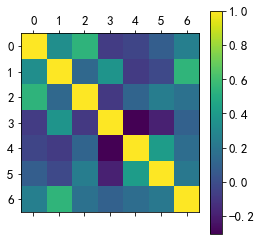

,Survived,PclassCode,SexCode,Age,SibSp,Parch,Fare
Survived,1.000000,0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
PclassCode,0.338481,1.000000,0.131900,0.369226,-0.083081,-0.018443,0.549500
SexCode,0.543351,0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,-0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,-0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [17]:
# 全部样本乘客各个属性的皮尔逊相关系数计算
corr_df = passengers_df[['Survived', 'PclassCode', 'SexCode', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.matshow(corr_df)
plt.colorbar()
plt.show()
corr_df

问题（5）的探索结果是：<br>
乘客各个属性与幸存（值定义为1）的皮尔逊相关系数值高低依次是：<br>
性别[SexCode]、<br>船舱等级[PclassCode]、<br>船票价格[Fare]、<br>登船的父母或小孩个数[Parch]、<br>登船的兄弟姐妹或配偶个数[SibSp]、<br>年龄[Age]<br>
其中 性别[SexCode]、船舱等级[PclassCode]是与幸存呈正相关程度最高的前两个属性，也就是说越是女性乘客越可能幸存，船舱等级越高越可能幸存，这与前面问题（2）、（3）的探索结果吻合。<br>
另外，年龄[Age]、登船的兄弟姐妹或配偶个数[SibSp]与幸存呈负相关（不过负相关程度都比较低），也就是说年龄越大越不可能幸存（与问题（4）的探索结果吻合），登船的兄弟姐妹或配偶个数越多越不可能幸存（这有点出乎意料！）。

## 六、结论

根据以上探索分析结果，我们可以得出结论：<br>
1. 女性乘客的幸存可能性比男性乘客更高
2. 船舱等级高的乘客幸存可能性比舱位等级低的乘客更高
3. 低年龄段的乘客幸存可能性比高年龄段的乘客更高<br>

当然，这些结论只是暂时的，因为我们分析的只是泰坦尼克号上部分乘客的样本数据，样本数据并未说明取样方式是随机的还是人为选择性的，如果样本数据不能反映总体情况的话，我们的结论也不能反映总体情况。在样本数据能反映整体情况的前提下，如果要判断数据差异是真正的差异还是数据中的噪音所导致，我们还需利用统计学来严格检查偶然得出这些结果的可能性。<br>

另外，我们不能得出因为是女性乘客所以幸存可能性高，或者 因为是船舱等级高所以幸存可能性高，又或者 因为年龄小所以幸存可能性高。因为变量间相关性并不能直接表明因果关系，有可能是其他因素引起的。针对本项目中的结论，我觉得可能的其他因素是人类在灾难面前对女性、儿童的本能爱护有关；还有个人的社会身份地位、经济实力等因素影响着个人的抗灾能力。<br>

我想，除了靠人性本能和个人能力外，提高灾难发生时幸存可能性在根本上还需要靠在灾难发生前要有合理的预案、充足的救灾人员物资，或许有一些灾难还可以从其他一些方面来努力避免。   

参考：
1. [泰坦尼克号乘客样本数据](https://github.com/ShiChJ/DAND-Basic-Materials/blob/master/P2/Project_Files/titanic-data.csv)
2. [样本数据字典及相关说明](https://www.kaggle.com/c/titanic/data)
3. [Pandas 可视化功能](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
4. [逻辑回归应用之Kaggle泰坦尼克之灾](http://blog.csdn.net/han_xiaoyang/article/details/49797143)
5. [Python 数据分析超简单入门:项目实践篇](http://www.sohu.com/a/192940207_100000703)
6. [Pandas DataFrame 皮尔逊相关系数计算](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
7. [皮尔逊相关系数计算](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
8. [皮尔逊相关系数可视化](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html?highlight=matshow#matplotlib.pyplot.matshow)
9. [IPython 水印魔术命令使用](https://github.com/rasbt/watermark)
10. [20年代初期英国master是对什么人的称呼](https://zhidao.baidu.com/question/1707555122611271460.html)